In [1]:
!pip install opendatasets

In [2]:
import numpy as np
import opendatasets as od
import pandas as pd


**TASK 01 - READING THE DATASET**

In [4]:
data = pd.read_csv('/content/weather dataset.csv', encoding='latin-1')
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


TASK 02 - CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT

In [5]:
# prompt: find the null values

data.isnull().sum()
data.duplicated().sum()



0

TASK 03 - PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON SEASON/HOLIDAY/WEEKEND/WEATHERCODE

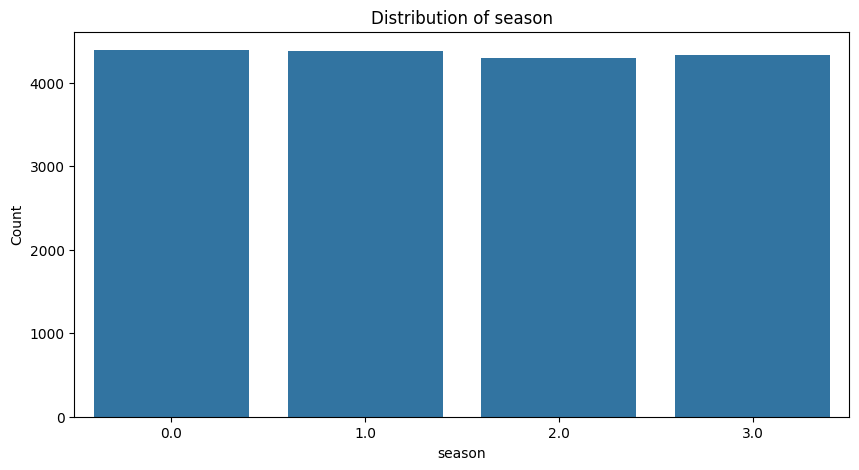

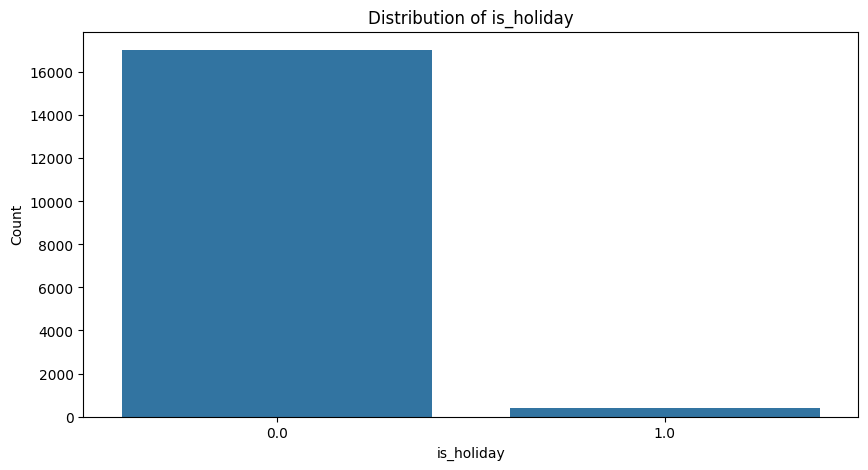

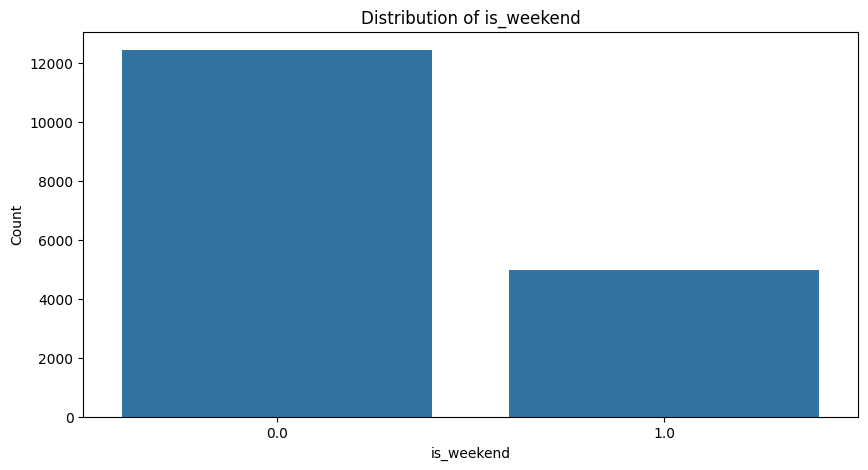

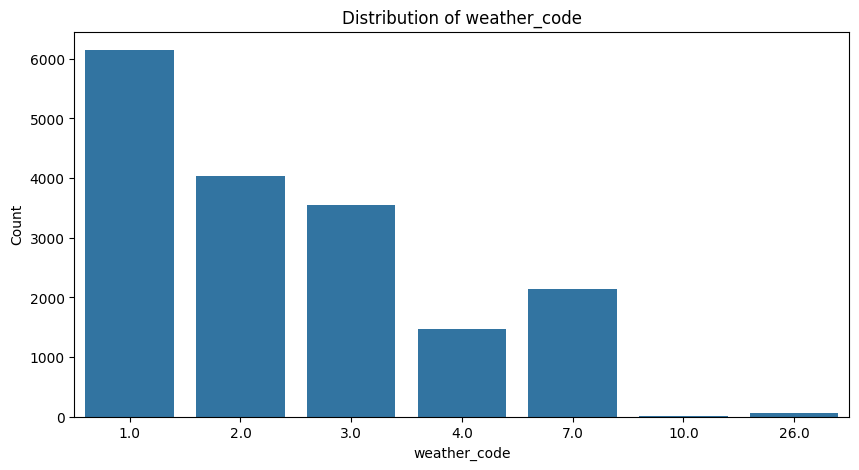

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


#  PLOTTING THE DISTRIBUTION OF VARIOUS DISCRETE FEATURES ON season/is_holiday/is_weekend/weather_code


def plot_categorical_features(df, features):
    for feature in features:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=feature, data=df)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.show()

categorical_features = ['season', 'is_holiday', 'is_weekend', 'weather_code']
plot_categorical_features(data, categorical_features)


TASK 04 - LOOKING AT THE DATA TYPES OF EACH VARIABLE, TRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX

In [7]:
#Check data types
print(data.dtypes)


timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object


In [9]:
# prompt: write a codeTRANSFORM TIMESTAMP IN TYPE & SET IT AS INDEX

import numpy as np
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install opendatasets

# # **TASK 01 - READING THE DATASET**
data = pd.read_csv('/content/weather dataset.csv', encoding='latin-1')
data
# #	TASK **02 - CHECKING MISSING VALUES & IF THERE ARE SOME DUBLICATE ROWS OR NOT**




#Check data types
print(data.dtypes)

# Assuming 'timestamp' is the column name containing timestamps
# Convert the 'timestamp' column to datetime objects
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Set the 'timestamp' column as the index
data = data.set_index('timestamp')

# Verify the changes
print(data.dtypes)
data.index

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object


DatetimeIndex(['2015-01-04 00:00:00', '2015-01-04 01:00:00',
               '2015-01-04 02:00:00', '2015-01-04 03:00:00',
               '2015-01-04 04:00:00', '2015-01-04 05:00:00',
               '2015-01-04 06:00:00', '2015-01-04 07:00:00',
               '2015-01-04 08:00:00', '2015-01-04 09:00:00',
               ...
               '2017-01-03 14:00:00', '2017-01-03 15:00:00',
               '2017-01-03 16:00:00', '2017-01-03 17:00:00',
               '2017-01-03 18:00:00', '2017-01-03 19:00:00',
               '2017-01-03 20:00:00', '2017-01-03 21:00:00',
               '2017-01-03 22:00:00', '2017-01-03 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=17414, freq=None)

TASK 05 - MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.

In [10]:

# prompt: MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.

# **TASK 05 - MAKING FEATURE ENGINEERING. EXTRACTING NEW COLUMNS (DAY OF WEEK, DAY OF MONTH, HOUR, MONTH, SEASON, YEAR ETC.)**

data['day_of_week'] = data.index.dayofweek
data['day_of_month'] = data.index.day
data['hour'] = data.index.hour
data['month'] = data.index.month
data['year'] = data.index.year

# Map numerical season representations to their corresponding names
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'}
data['season_name'] = data['season'].map(season_mapping)


# Example to show how to create new features based on existing ones
# For example: create a feature to represent rush hour
data['is_rush_hour'] = ((data['hour'] >= 7) & (data['hour'] <= 9)) | ((data['hour'] >= 16) & (data['hour'] <= 19))
data['is_rush_hour'] = data['is_rush_hour'].astype(int) # convert boolean to int

# Display the updated DataFrame with the new features
print(data.head())


                     cnt   t1   t2    hum  wind_speed  weather_code  \
timestamp                                                             
2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

                     is_holiday  is_weekend  season  day_of_week  \
timestamp                                                          
2015-01-04 00:00:00         0.0         1.0     3.0            6   
2015-01-04 01:00:00         0.0         1.0     3.0            6   
2015-01-04 02:00:00         0.0         1.0     3.0            6   
2015-01-04 03:00:00         0.0         1.0     3.0            6   
2015-01-04 04:00:00         0.0         1.0     3.0            6   

                     day_

TASK 06 - VISUALIZING THE CORRELATION WITH A HEATMAP

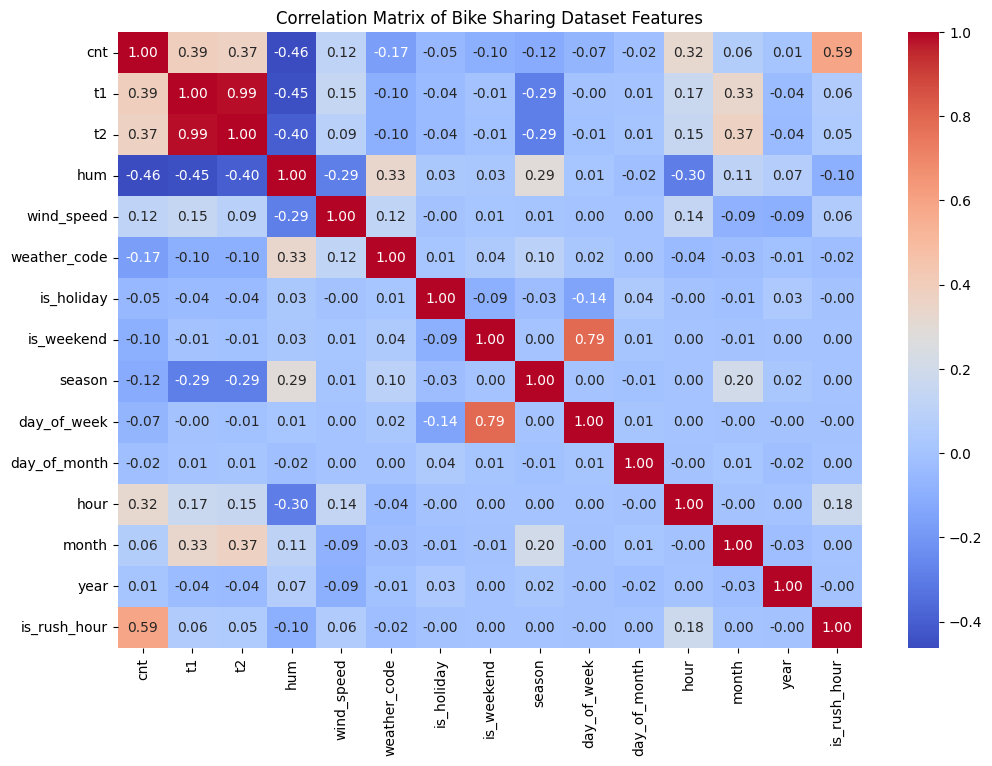

In [11]:
# Calculate the correlation matrix, but only for numeric columns
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bike Sharing Dataset Features')
plt.show()

TASK 07 - VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLO

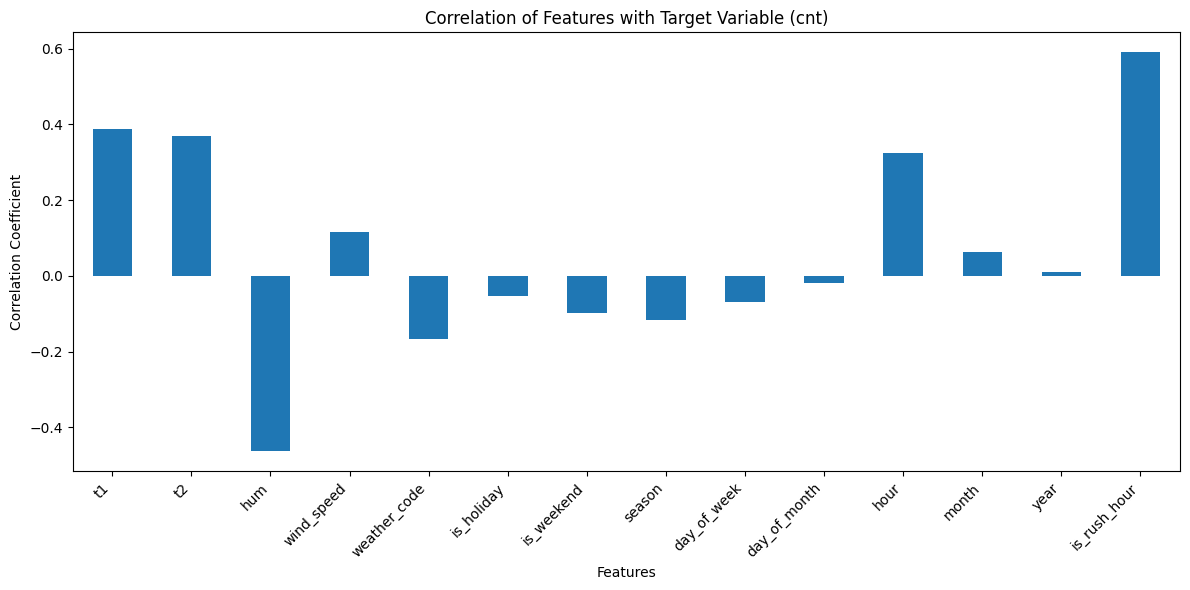

In [12]:
# prompt: VISUALIZING THE CORRELATION OF THE TARGET VARIABLE & THE OTHER FEATURES WITH BARPLO

# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.

# Calculate the correlation between the target variable ('cnt') and other features.
# Select only numeric columns before calculating correlation
correlation_with_target = data.select_dtypes(include=['number']).corr()['cnt'].drop('cnt')  # Exclude 'cnt' itself

# Create a bar plot to visualize the correlation
plt.figure(figsize=(12, 6))
correlation_with_target.plot(kind='bar')
plt.title('Correlation of Features with Target Variable (cnt)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

TASK 08 - PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT

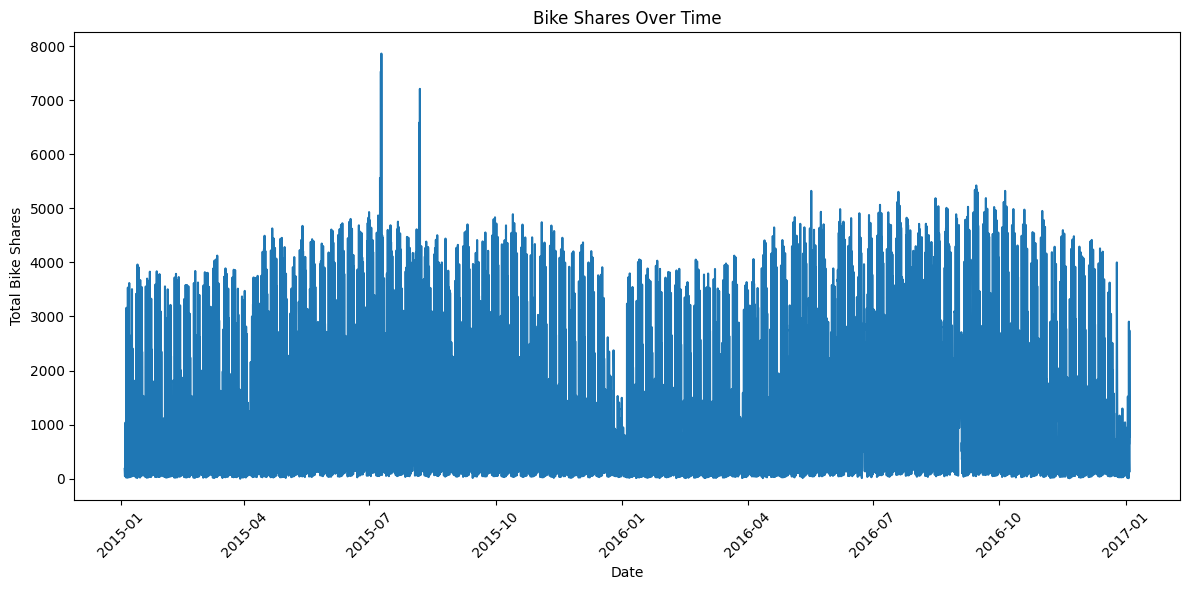

In [13]:
# prompt: PLOTTING BIKE SHARES OVER TIME BY USING LINEPLOT


# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.
# Resample the data to get the total count of bike shares per day
daily_bike_shares = data.groupby('timestamp')['cnt'].sum().reset_index()


# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='cnt', data=daily_bike_shares)
plt.title('Bike Shares Over Time')
plt.xlabel('Date')
plt.ylabel('Total Bike Shares')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TASK 09 - PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)

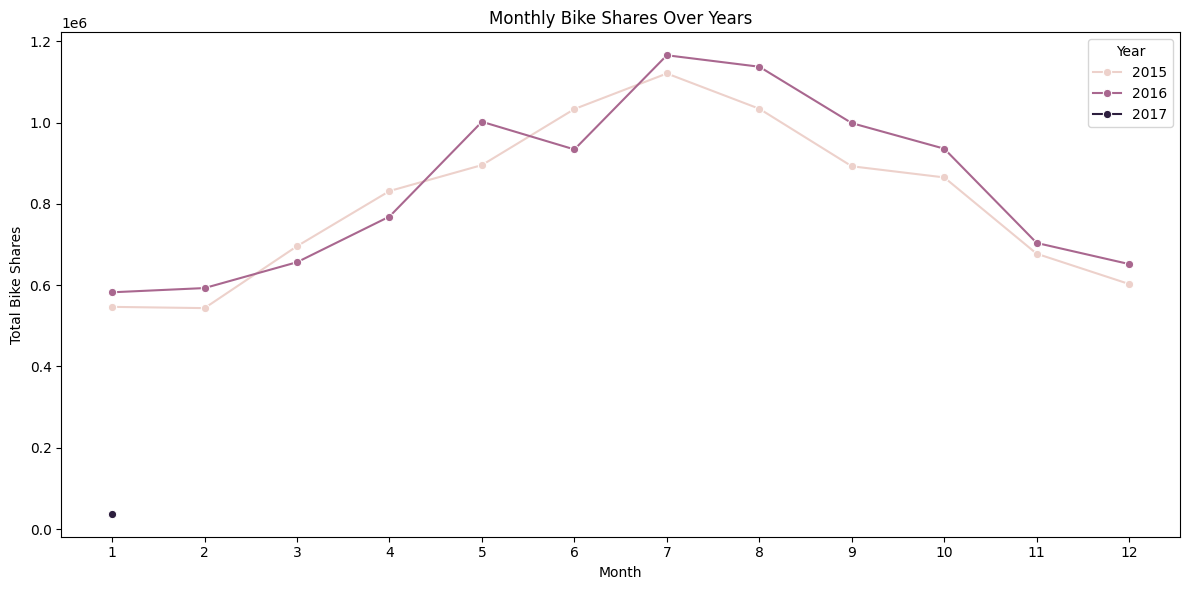

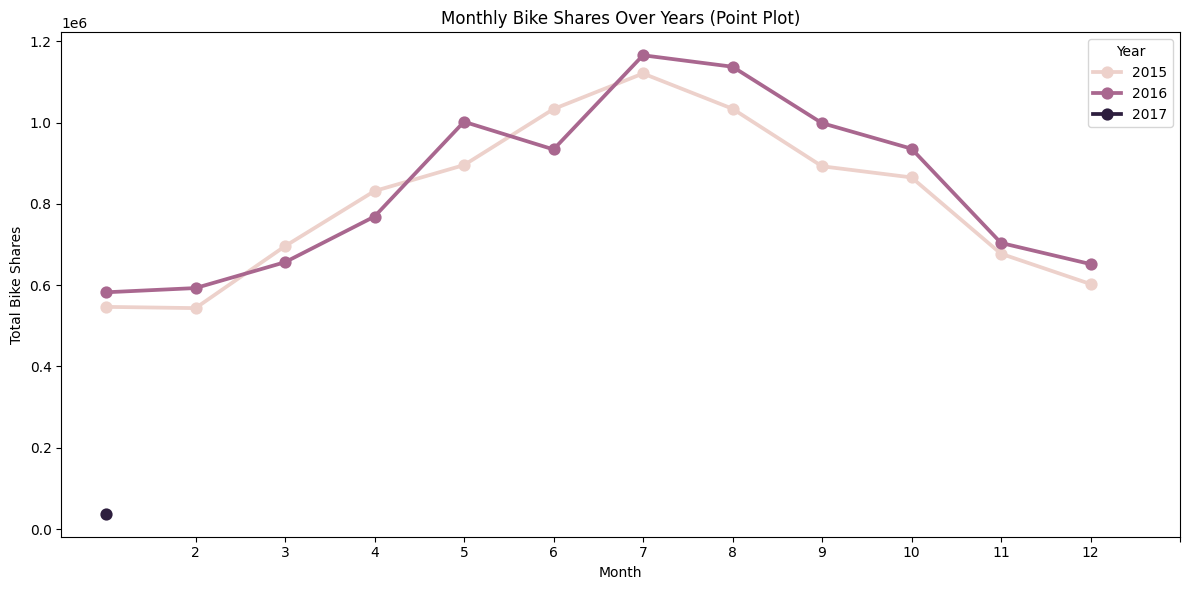

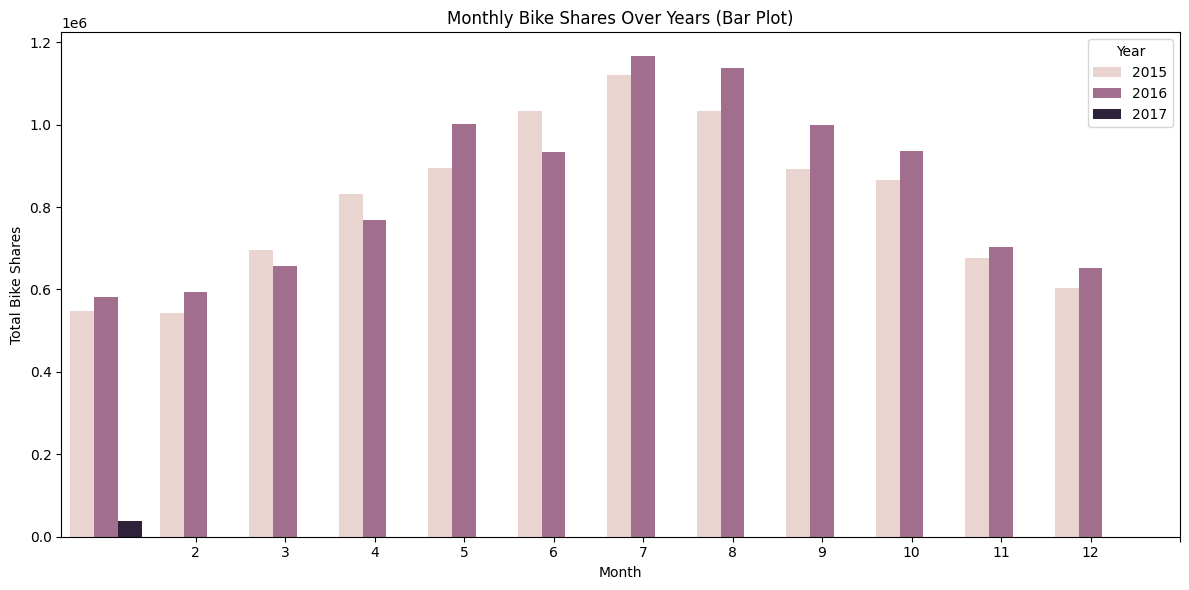

In [14]:
# prompt: PLOTTING BIKE SHARES BY MONTHS & YEAR_OF_MONTH (USE LINEPLOT, POINTPOT, BARPLOT)

# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.
# Ensure 'month' and 'year' columns exist:

# Check if 'month' and 'year' columns exist in the DataFrame
if 'month' not in data.columns or 'year' not in data.columns:
    # If not present, extract them from the timestamp
    data['month'] = data.index.month  # Extract month from the timestamp index
    data['year'] = data.index.year   # Extract year from the timestamp index

# Group data by month and year, then sum the bike shares ('cnt')
monthly_bike_shares = data.groupby(['month', 'year'])['cnt'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='cnt', hue='year', data=monthly_bike_shares, marker='o')  # Add markers
plt.title('Monthly Bike Shares Over Years')
plt.xlabel('Month')
plt.ylabel('Total Bike Shares')
plt.xticks(range(1, 13)) # Ensure all months are displayed on x-axis
plt.legend(title='Year')
plt.tight_layout()
plt.show()


# Create the point plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='month', y='cnt', hue='year', data=monthly_bike_shares)
plt.title('Monthly Bike Shares Over Years (Point Plot)')
plt.xlabel('Month')
plt.ylabel('Total Bike Shares')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()


# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='cnt', hue='year', data=monthly_bike_shares)
plt.title('Monthly Bike Shares Over Years (Bar Plot)')
plt.xlabel('Month')
plt.ylabel('Total Bike Shares')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()


TASK 10 - PLOTTING BIKE SHARES BY HOURS ON (HOLIDAYS, WEEKEND, SEASON)

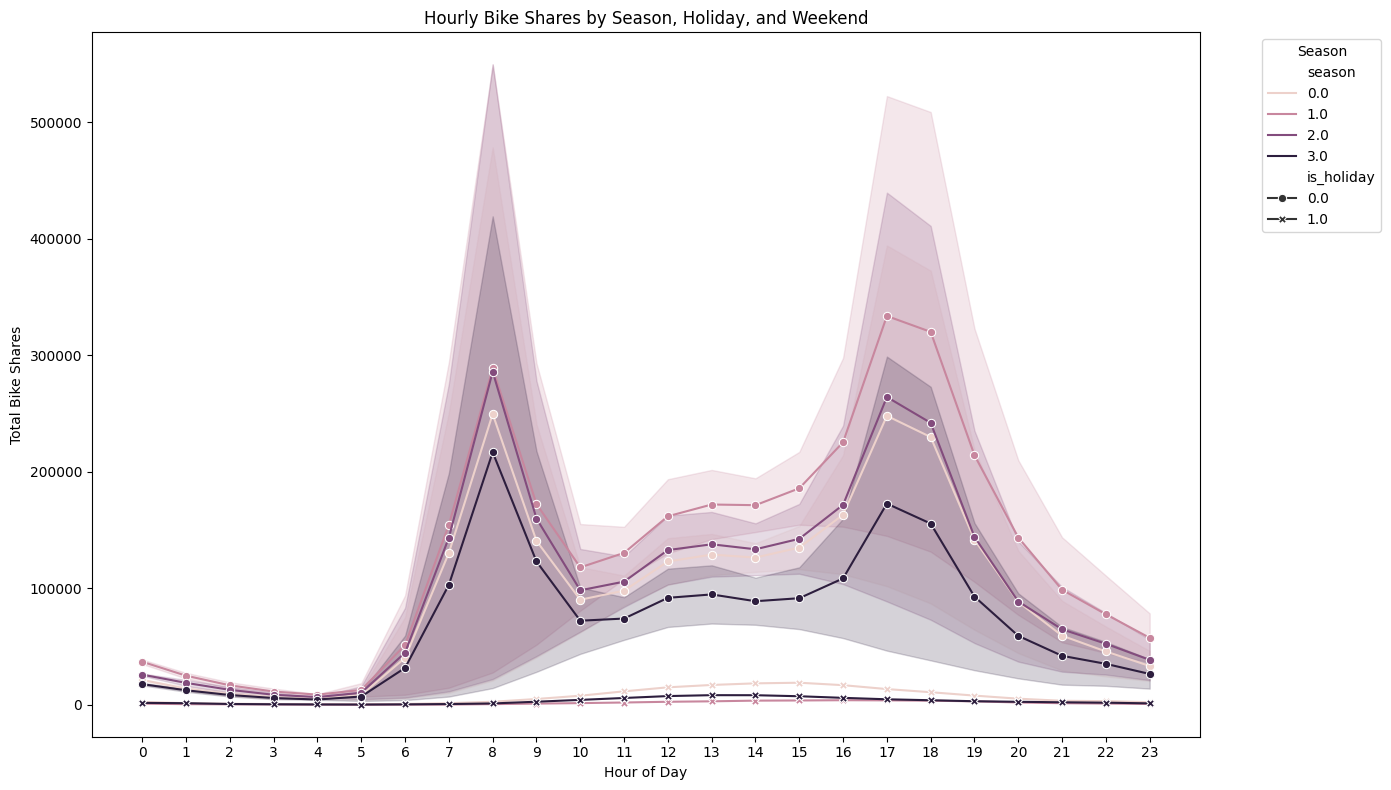

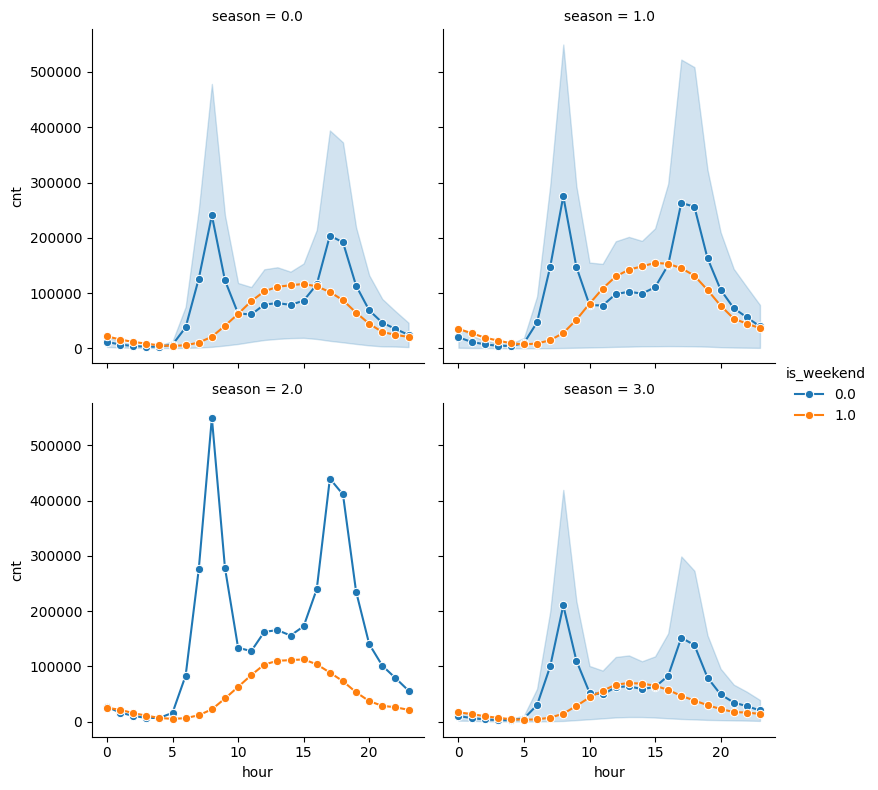

In [15]:
# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.

# Ensure 'hour', 'season', 'is_holiday', and 'is_weekend' columns exist
if 'hour' not in data.columns:
    data['hour'] = data.index.hour  # Extract hour from the timestamp index
if 'season' not in data.columns:
    # Define a function to determine the season
    def get_season(month):
        if month in [12, 1, 2]:
            return 'winter'
        elif month in [3, 4, 5]:
            return 'spring'
        elif month in [6, 7, 8]:
            return 'summer'
        else:
            return 'autumn'
    data['season'] = data.index.month.apply(get_season)  # Extract and apply season from timestamp index
# Assuming 'is_holiday' and 'is_weekend' columns already exist in your DataFrame

# Group data by hour, season, is_holiday, and is_weekend, then sum the bike shares ('cnt')
hourly_bike_shares = data.groupby(['hour', 'season', 'is_holiday', 'is_weekend'])['cnt'].sum().reset_index()

# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(x='hour', y='cnt', hue='season', style='is_holiday', markers=True, dashes=False, data=hourly_bike_shares)
plt.title('Hourly Bike Shares by Season, Holiday, and Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Total Bike Shares')
plt.xticks(range(24))
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left') # Adjust legend position
plt.tight_layout()
plt.show()


#Alternative visualization using FacetGrid

g = sns.FacetGrid(hourly_bike_shares, col="season", hue="is_weekend", col_wrap=2, height=4)
g.map(sns.lineplot, "hour", "cnt", marker="o")
g.add_legend()
plt.show()

TASK 11 - PLOTTING BIKE SHARES BY DAY OF WEEK


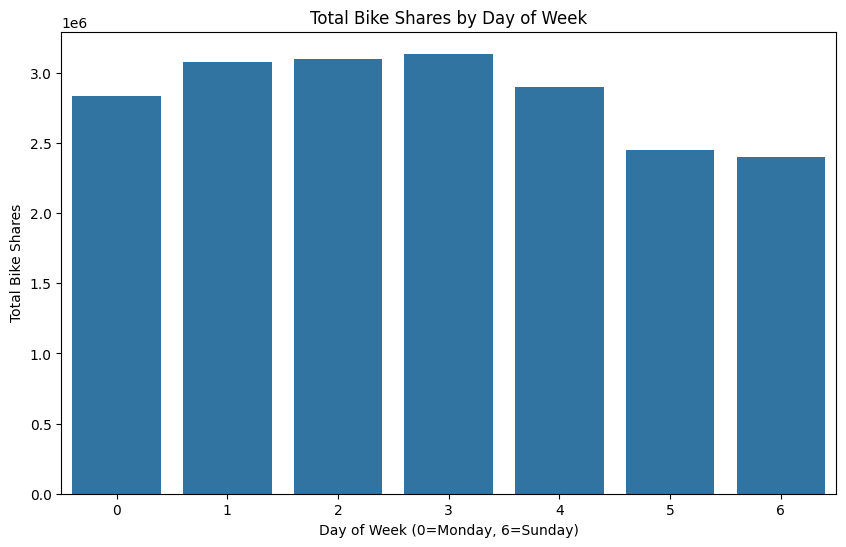

In [16]:
# prompt: PLOTTING BIKE SHARES BY DAY OF WEEK

# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.

# Check if 'day_of_week' column exists, if not, create it
if 'day_of_week' not in data.columns:
    data['day_of_week'] = data.index.dayofweek  # Extract day of week from timestamp index

# Group data by day of the week and sum the bike shares ('cnt')
daily_bike_shares = data.groupby('day_of_week')['cnt'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='cnt', data=daily_bike_shares)
plt.title('Total Bike Shares by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Bike Shares')
plt.show()


TASK 12 - PLOTTING BIKE SHARES BY DAY OF MONTH

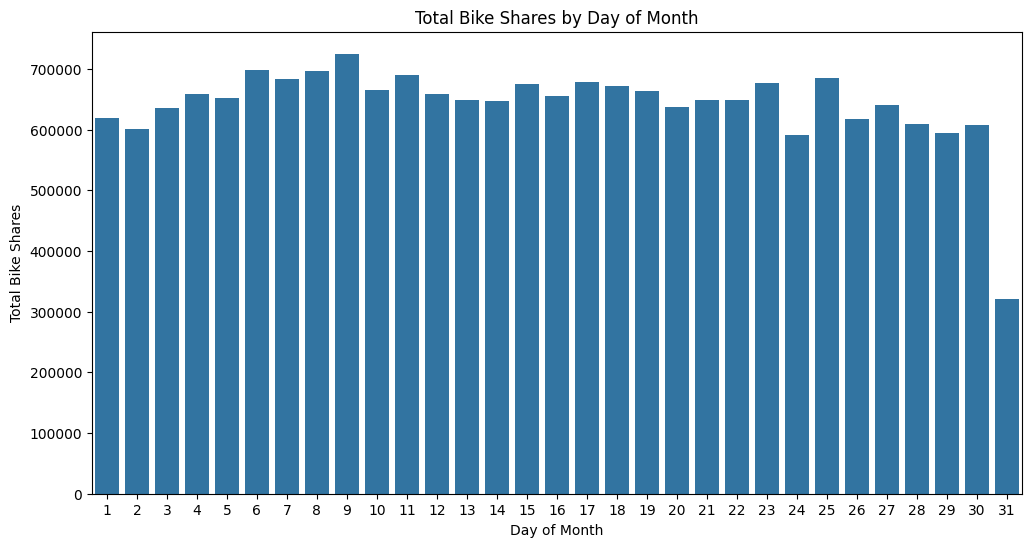

In [17]:

# prompt: PLOTTING BIKE SHARES BY DAY OF MONTH

# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.

# Check if 'day_of_month' column exists, if not, create it
if 'day_of_month' not in data.columns:
    data['day_of_month'] = data.index.day  # Extract day of month from timestamp index

# Group data by day of the month and sum the bike shares ('cnt')
daily_bike_shares = data.groupby('day_of_month')['cnt'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_month', y='cnt', data=daily_bike_shares)
plt.title('Total Bike Shares by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Total Bike Shares')
plt.show()



TASK 13 - PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON

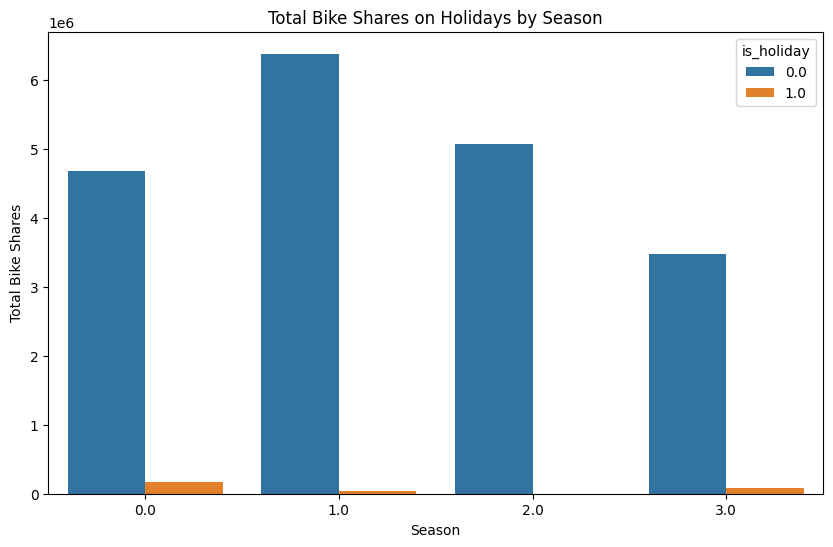

In [18]:
# prompt: PLOTTING BIKE SHARES BY YEAR & PLOTTING BIKE SHARES ON HOLIDAYS BY SEASON

# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.

# Group data by 'is_holiday', 'season', and sum the bike shares ('cnt')
holiday_season_bike_shares = data.groupby(['is_holiday', 'season'])['cnt'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', hue='is_holiday', data=holiday_season_bike_shares)
plt.title('Total Bike Shares on Holidays by Season')
plt.xlabel('Season')
plt.ylabel('Total Bike Shares')
plt.show()

TASK 14 - VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT

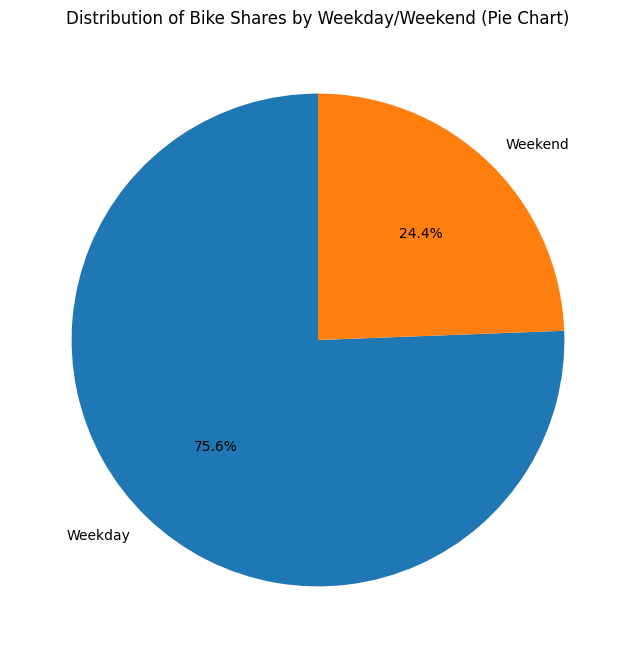

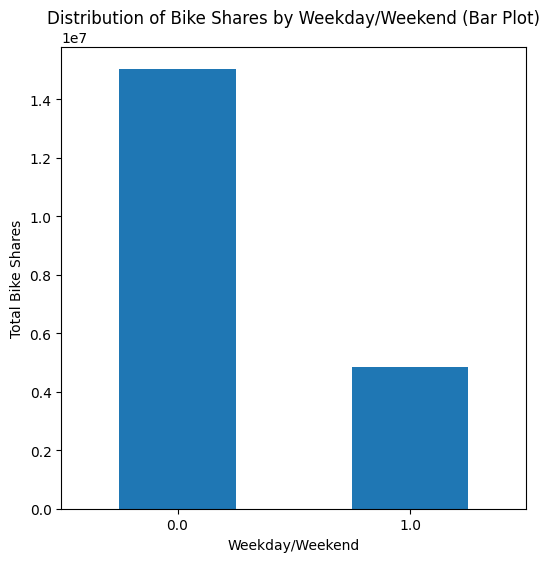

In [19]:
# prompt: VISUALIZING THE DISTRIBUTION OF BIKE SHARES BY WEEKDAY-WEEKEND WITH USING PIECHART & BARPLOT



# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.

# Group data by 'is_weekend' and sum the bike shares ('cnt')
weekend_bike_shares = data.groupby('is_weekend')['cnt'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weekend_bike_shares, labels=['Weekday', 'Weekend'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Bike Shares by Weekday/Weekend (Pie Chart)')
plt.show()

# Create a bar plot
plt.figure(figsize=(6, 6))
weekend_bike_shares.plot(kind='bar')
plt.title('Distribution of Bike Shares by Weekday/Weekend (Bar Plot)')
plt.xlabel('Weekday/Weekend')
plt.ylabel('Total Bike Shares')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

TASK 15 - PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON

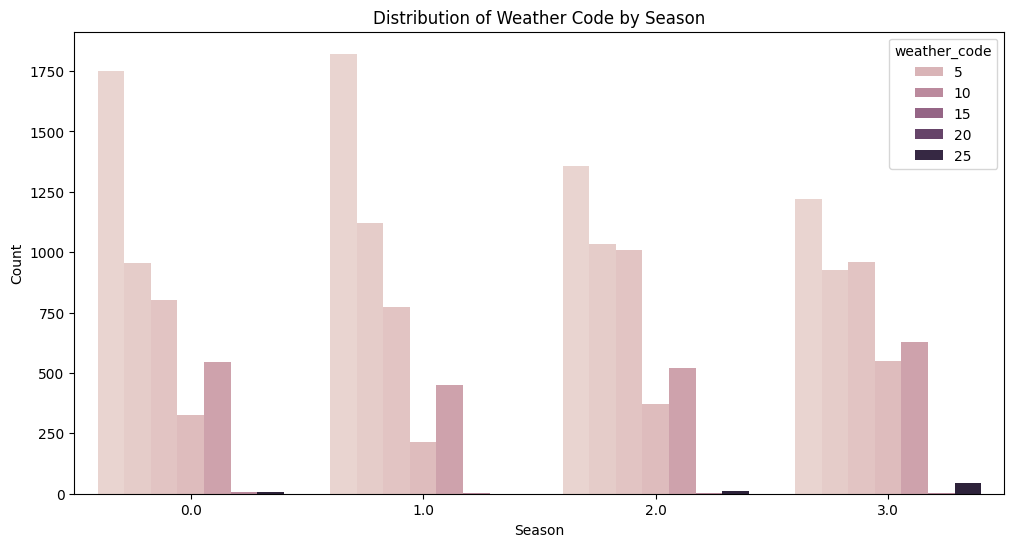

In [20]:
# prompt: PLOTTING THE DISTRIBUTION OF WEATHER CODE BY SEASON

# Assuming 'data' DataFrame is already loaded and processed as shown in the previous code.

# Group data by 'season' and 'weather_code', then count the occurrences
weather_season_counts = data.groupby(['season', 'weather_code']).size().reset_index(name='counts')

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='counts', hue='weather_code', data=weather_season_counts)
plt.title('Distribution of Weather Code by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

